In [69]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

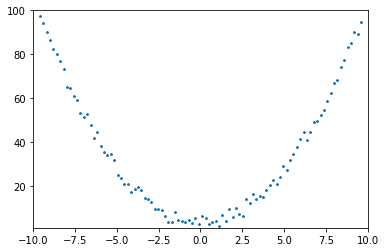

In [70]:
x=torch.unsqueeze(torch.linspace(-10,10,100),dim=1)
y=x.pow(2)+7*torch.rand(x.size())
x,y=Variable(x),Variable(y)
plt.axis((-10,10,1,100))
plt.scatter(x.data.numpy(),y.data.numpy(),s=5,marker='*')

In [71]:
class NerualNetwork(torch.nn.Module):
    def __init__(self,input_layer,hidden_layer1,hidden_layer2,output_layer):
        super(NerualNetwork,self).__init__()
        self.hd_l1=torch.nn.Linear(input_layer,hidden_layer1)
        self.hd_l2=torch.nn.Linear(hidden_layer1,hidden_layer2)
        self.out=torch.nn.Linear(hidden_layer2,output_layer)
    def forward(self,x):
        x=F.relu(self.hd_l1(x))
        x=F.relu(self.hd_l2(x))
        x=self.out(x)
        return x


In [72]:
net=NerualNetwork(1,2,10,1)
print (net)

NerualNetwork(
  (hd_l1): Linear(in_features=1, out_features=2)
  (hd_l2): Linear(in_features=2, out_features=10)
  (out): Linear(in_features=10, out_features=1)
)


In [73]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.1)
loss_func=torch.nn.MSELoss()

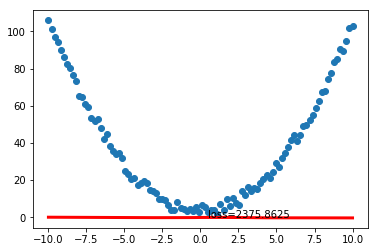

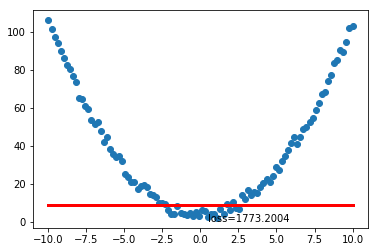

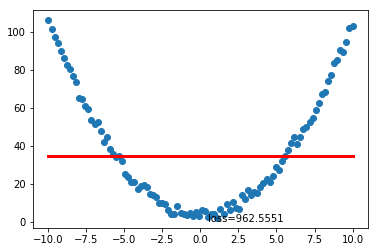

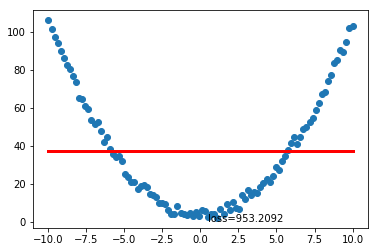

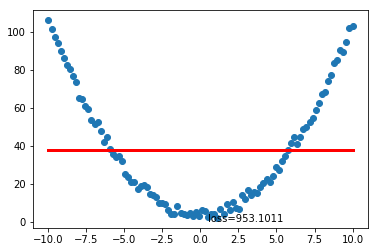

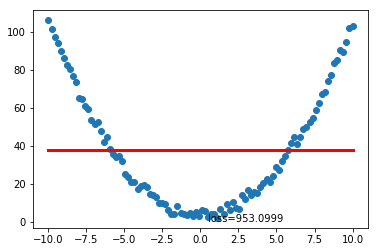

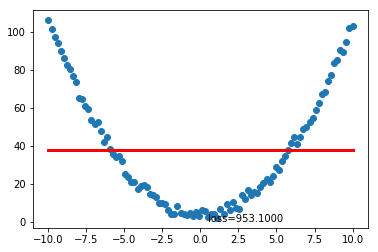

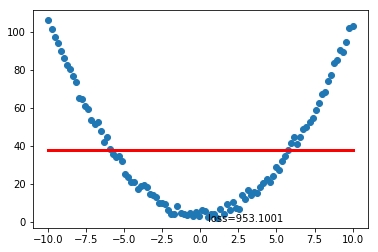

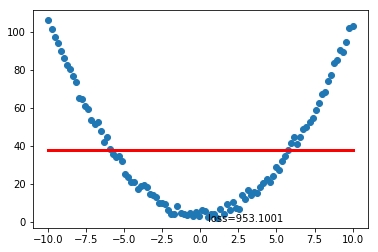

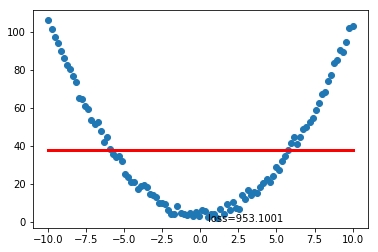

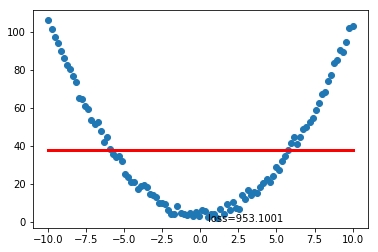

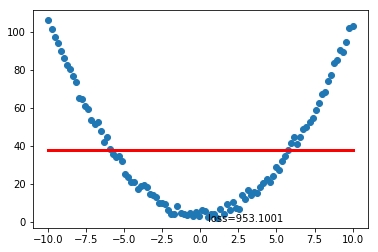

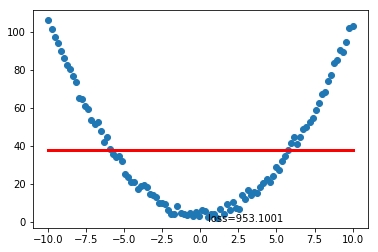

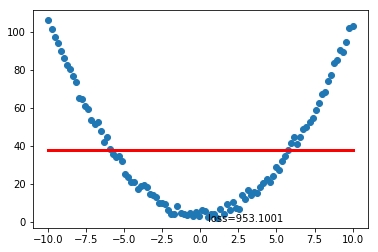

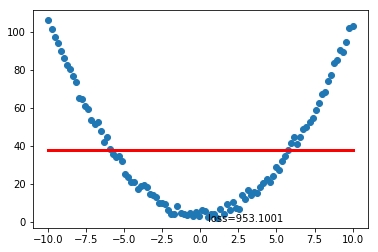

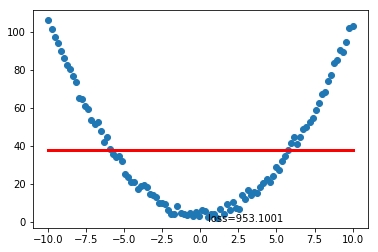

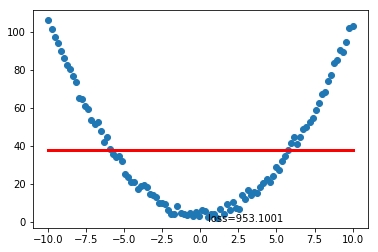

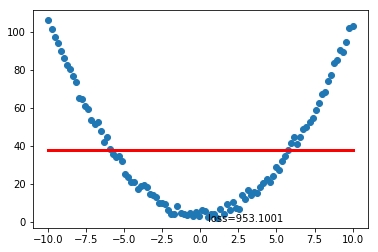

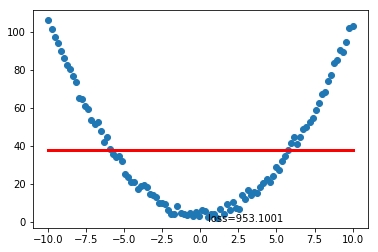

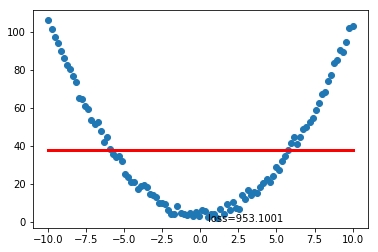

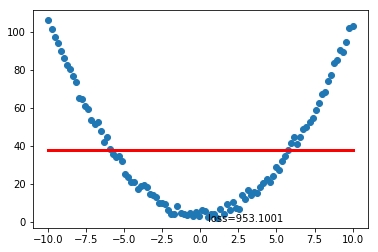

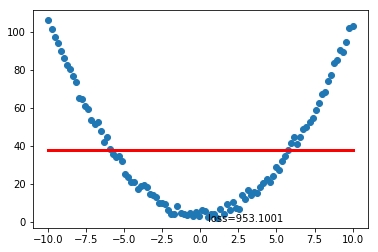

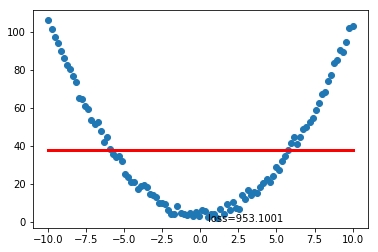

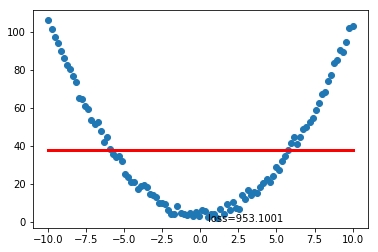

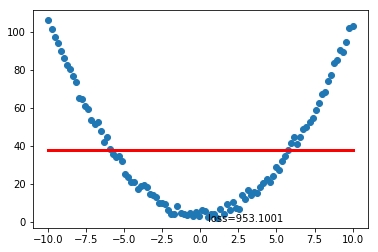

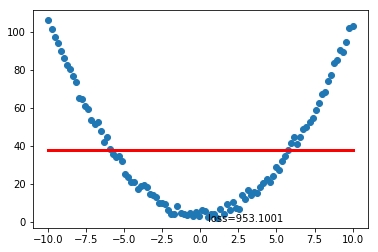

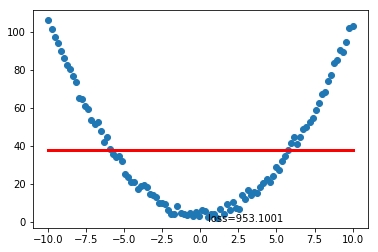

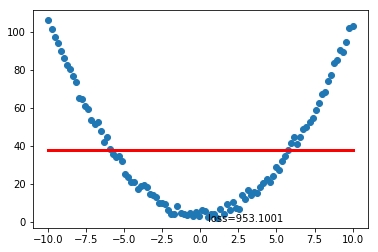

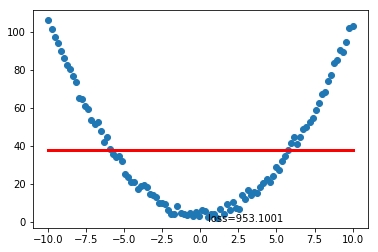

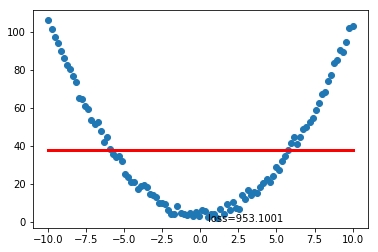

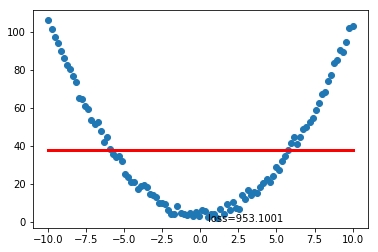

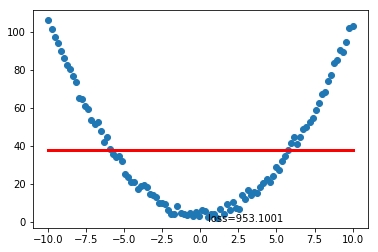

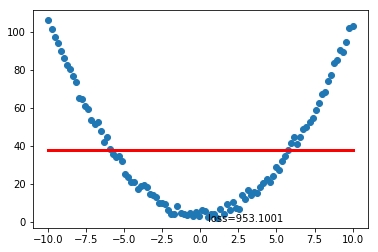

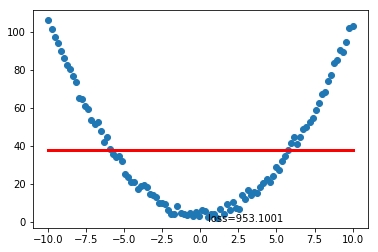

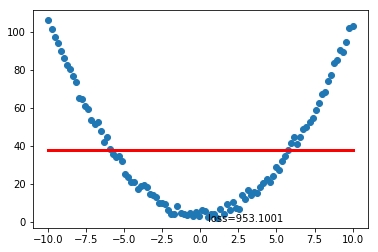

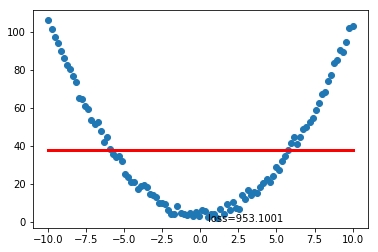

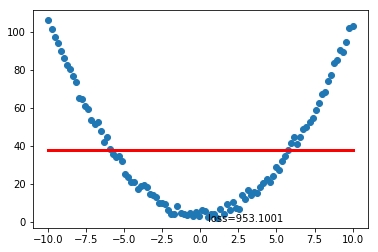

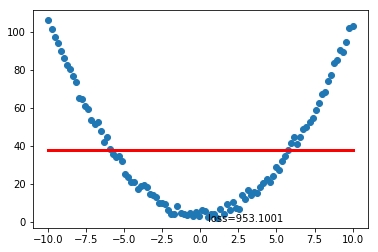

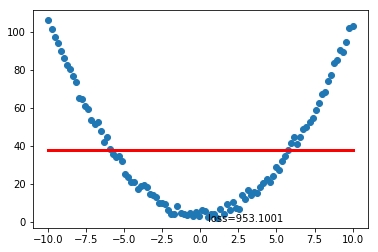

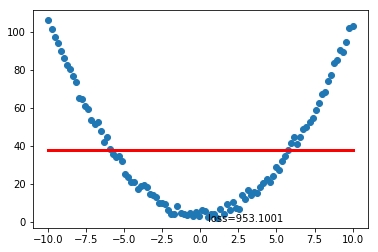

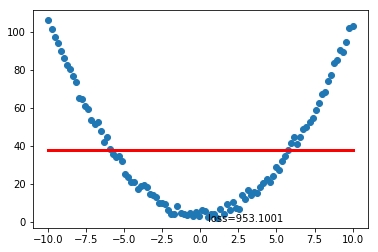

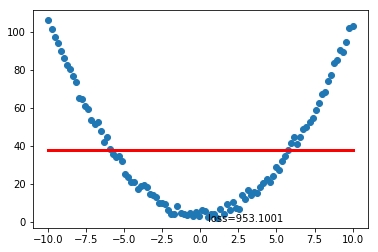

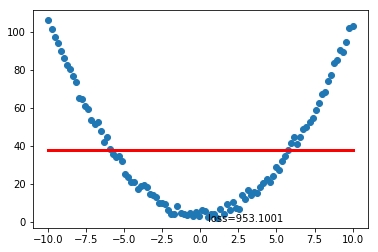

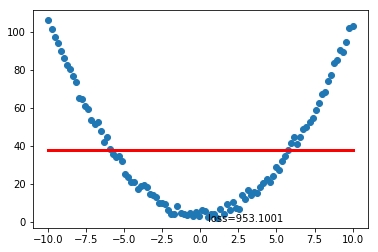

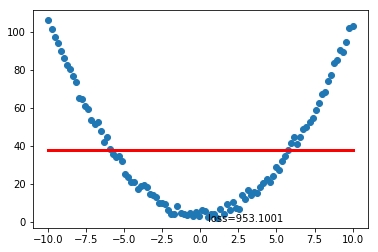

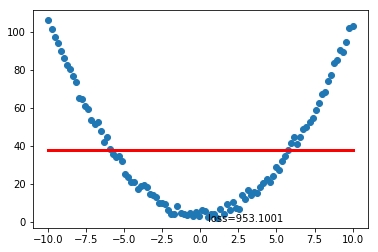

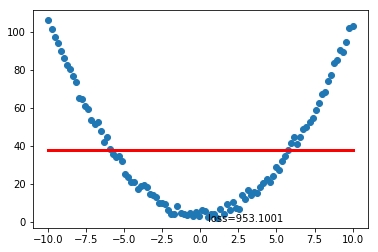

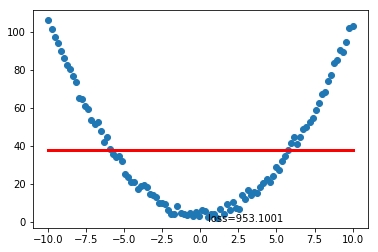

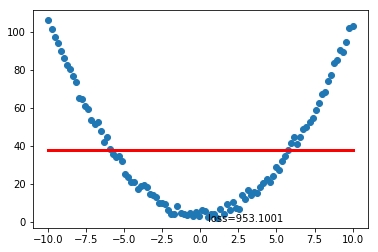

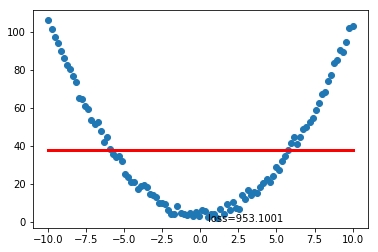

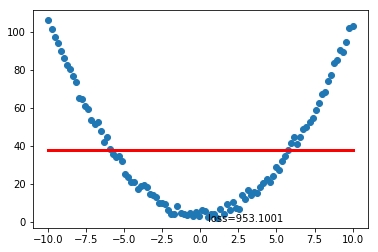

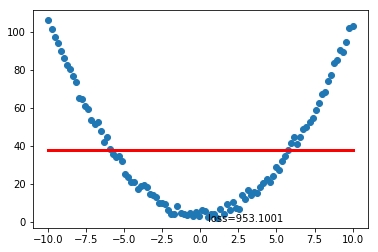

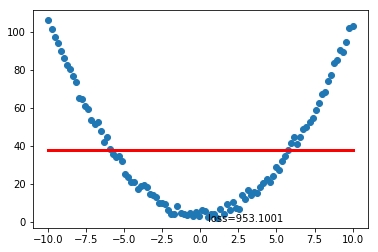

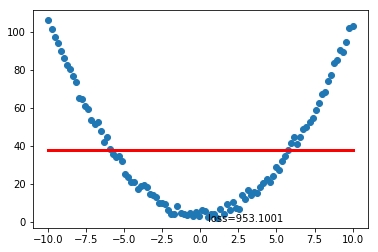

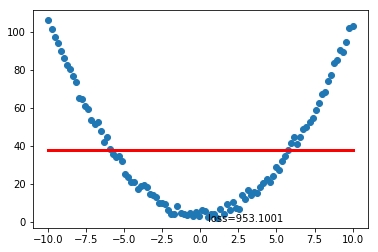

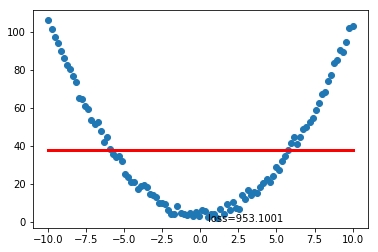

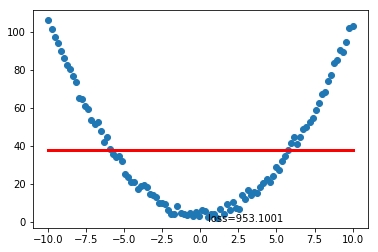

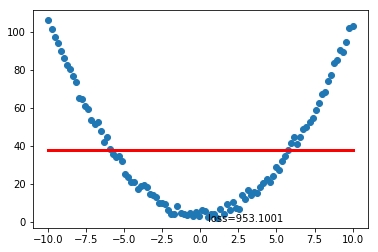

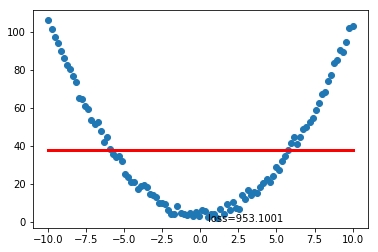

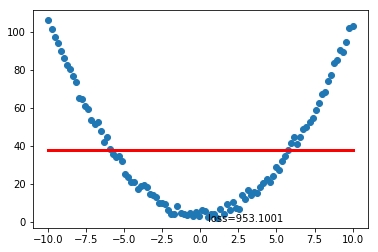

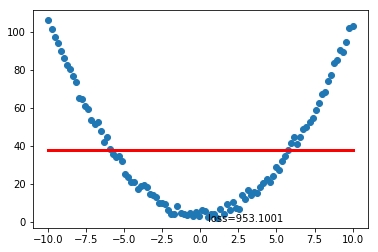

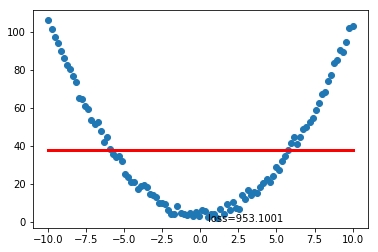

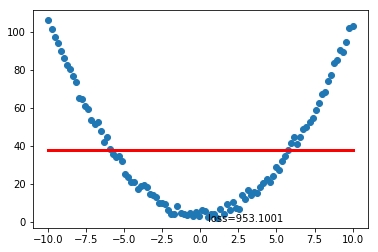

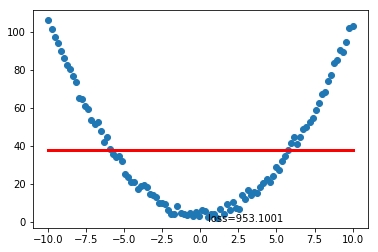

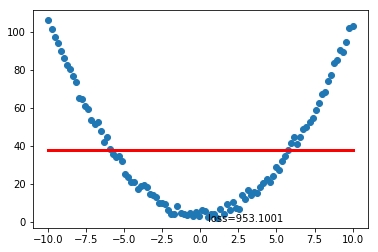

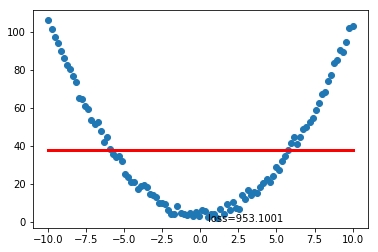

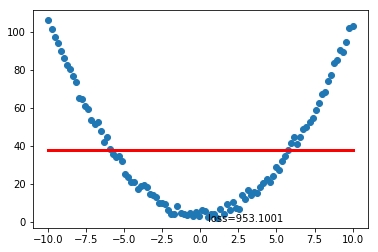

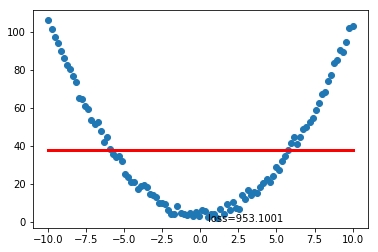

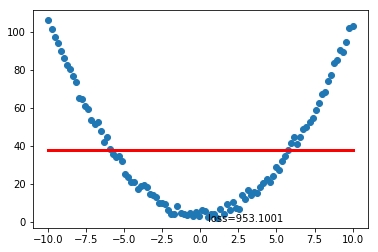

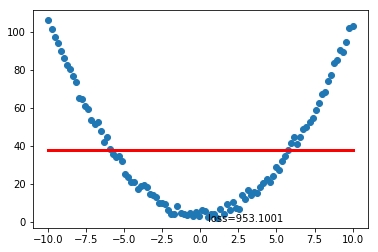

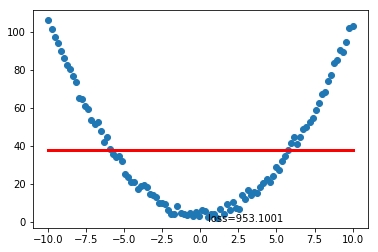

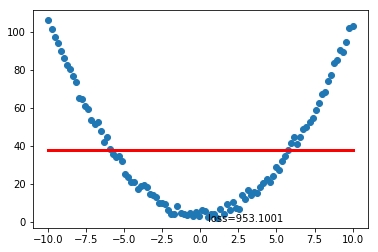

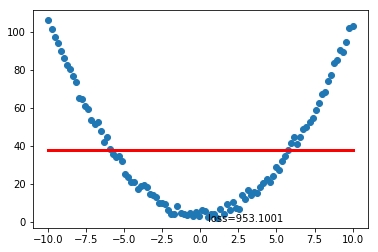

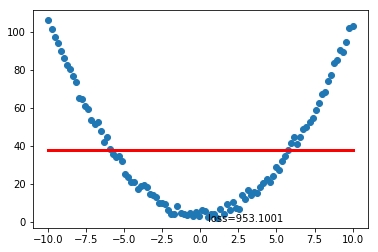

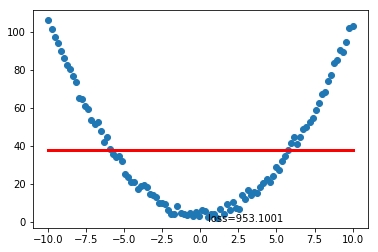

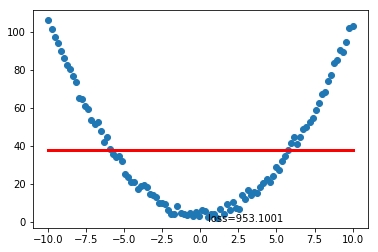

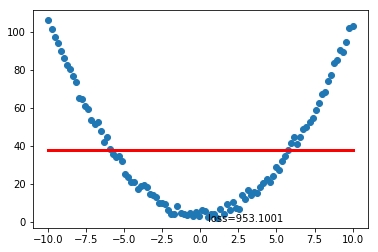

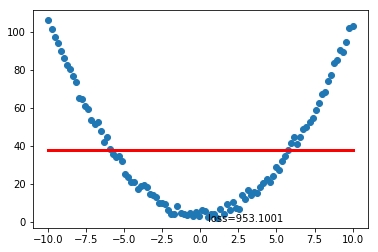

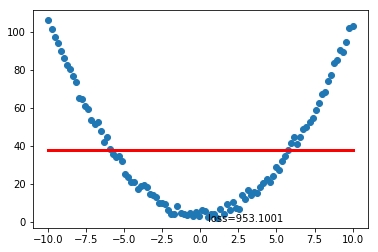

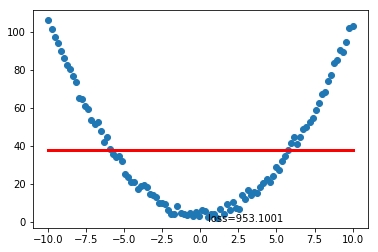

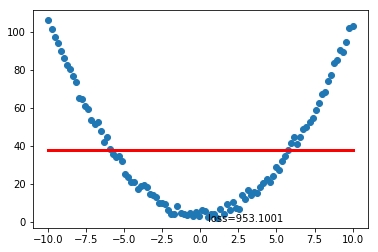

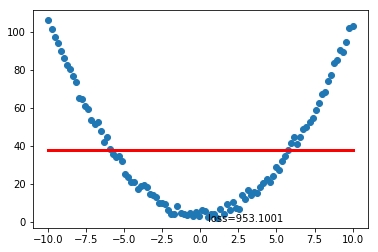

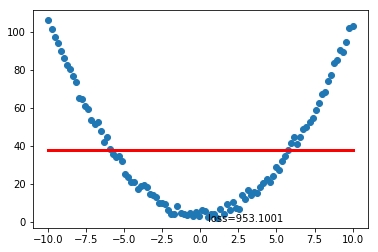

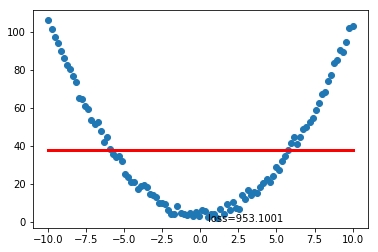

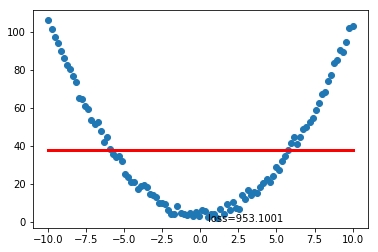

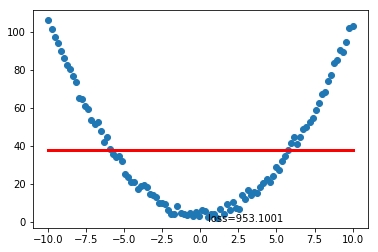

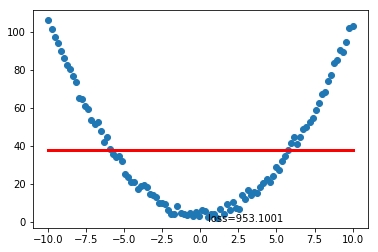

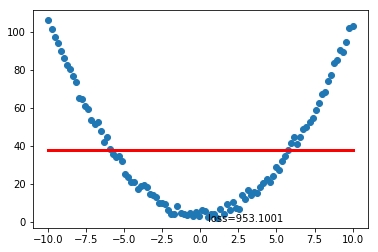

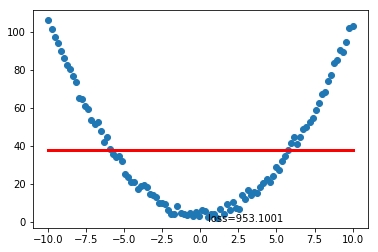

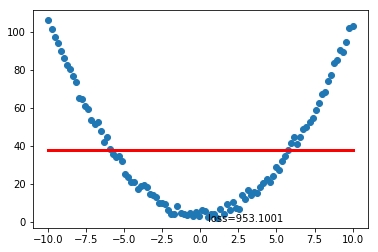

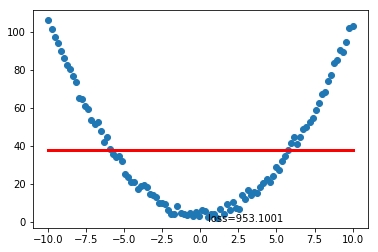

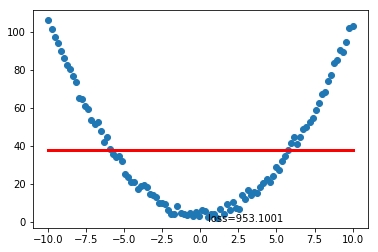

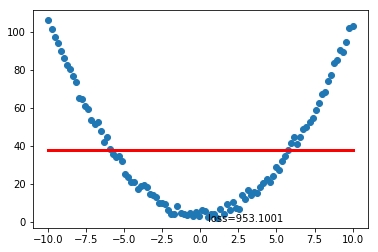

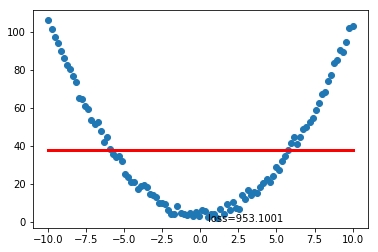

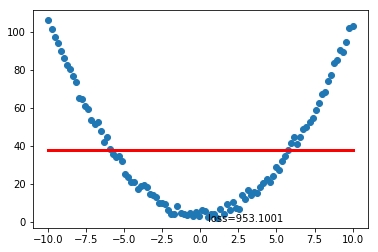

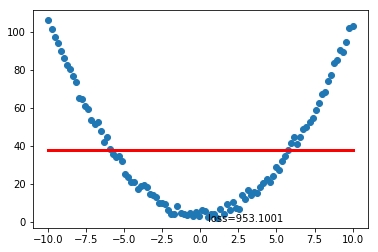

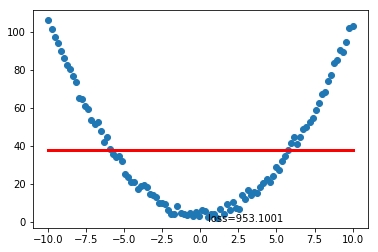

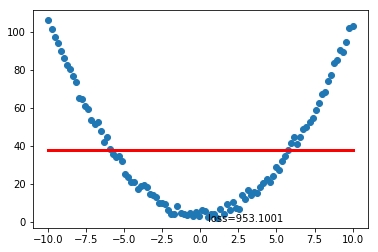

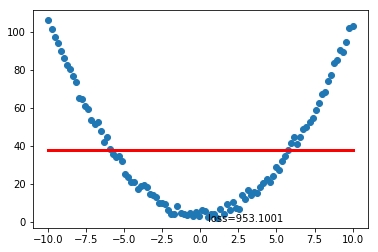

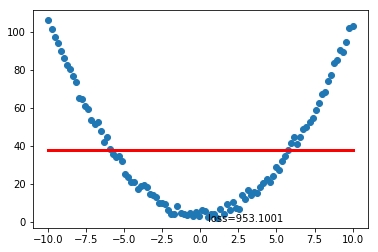

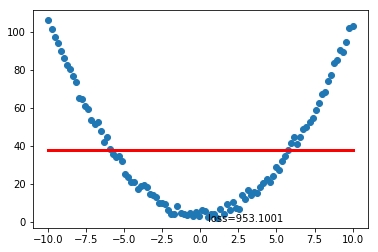

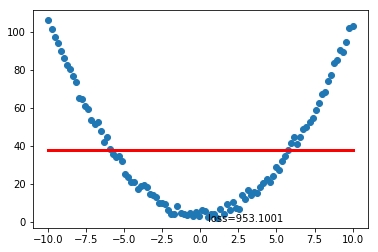

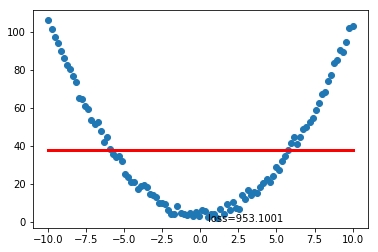

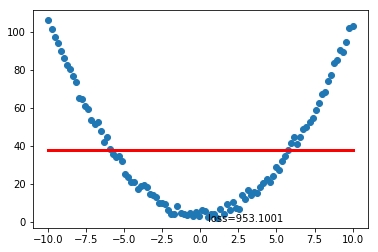

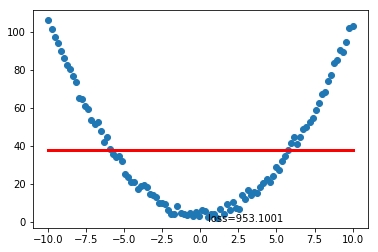

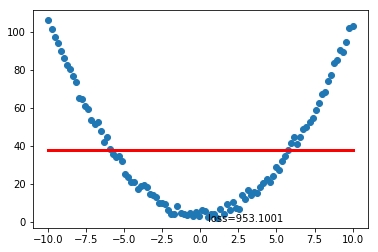

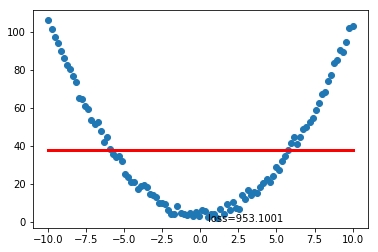

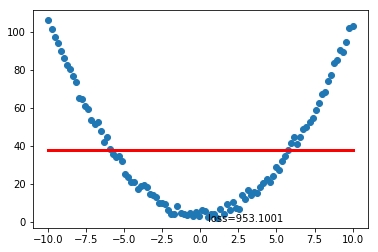

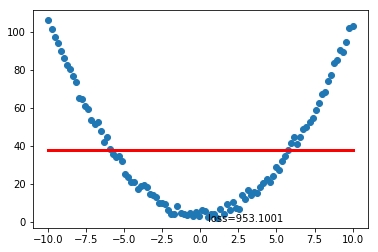

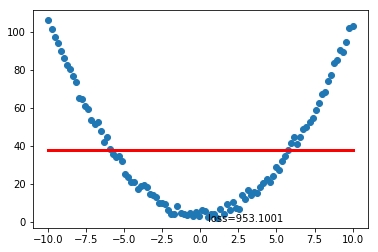

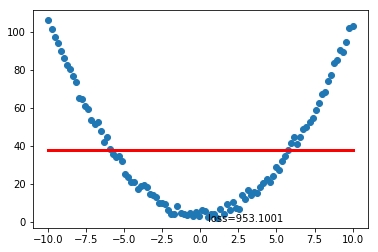

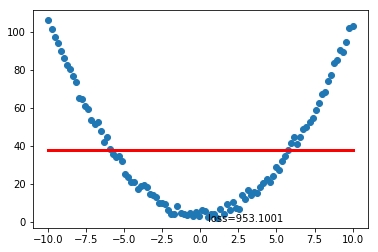

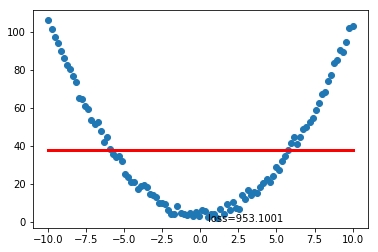

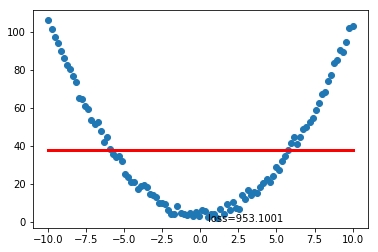

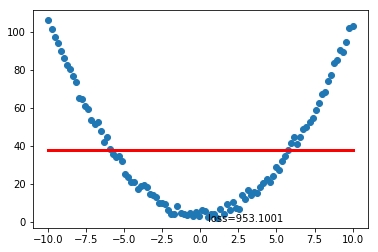

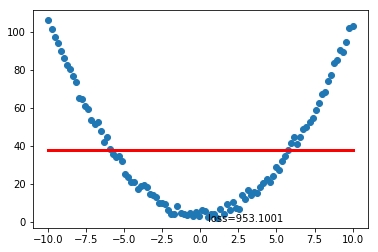

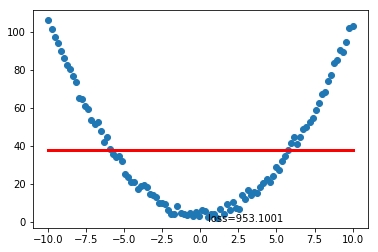

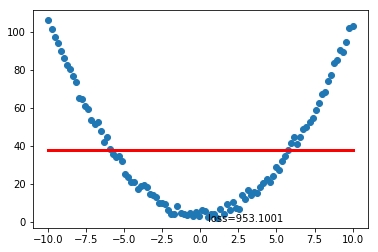

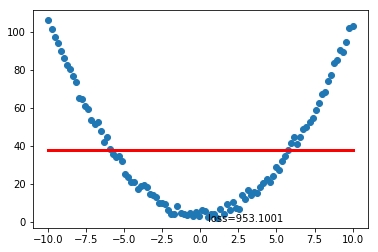

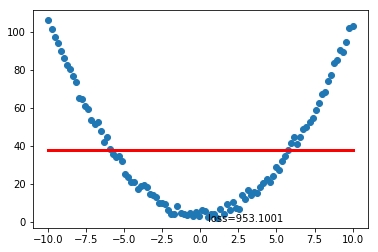

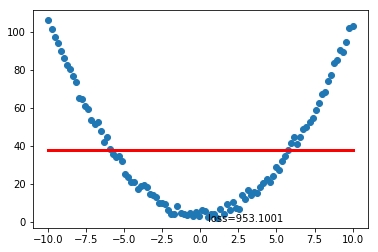

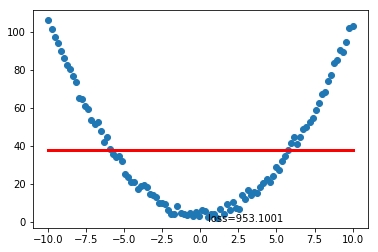

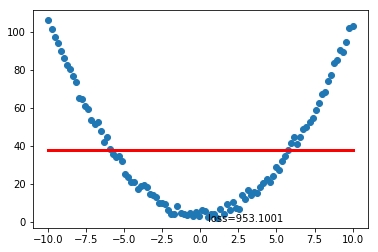

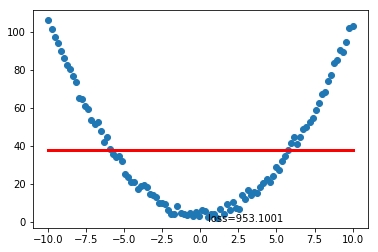

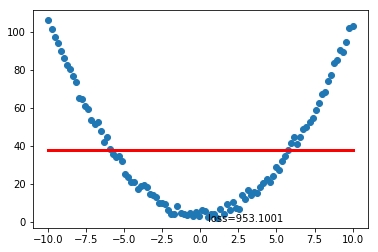

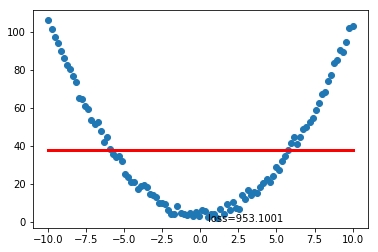

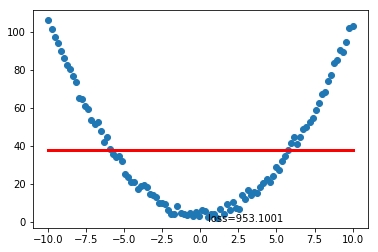

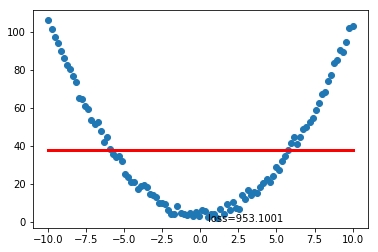

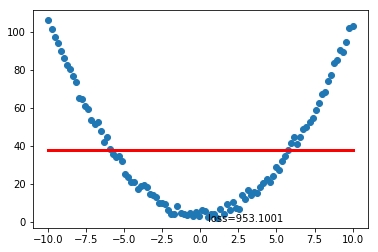

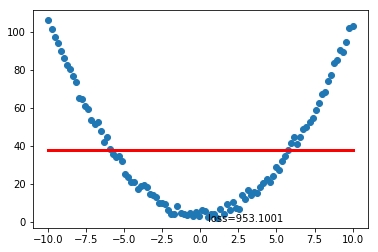

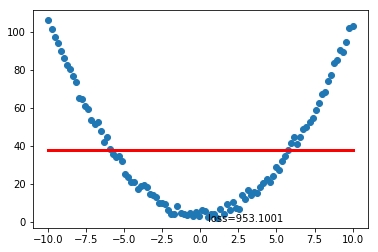

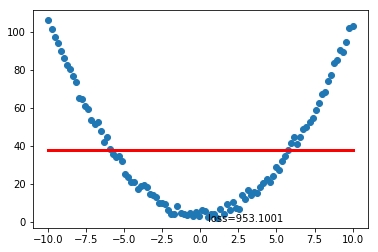

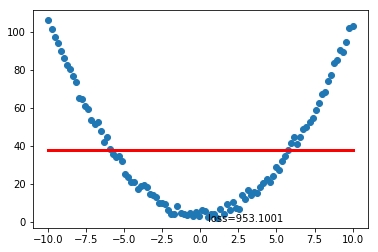

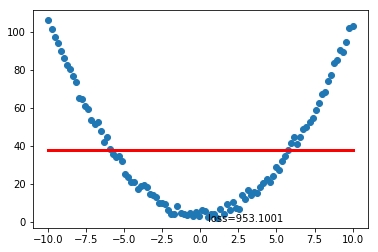

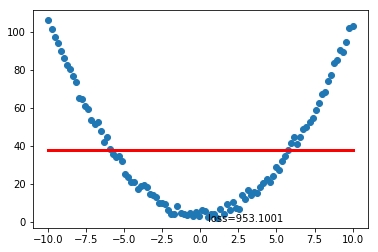

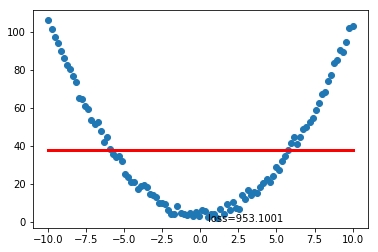

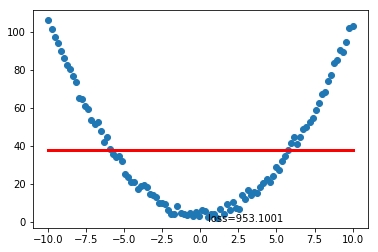

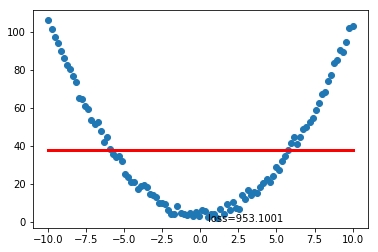

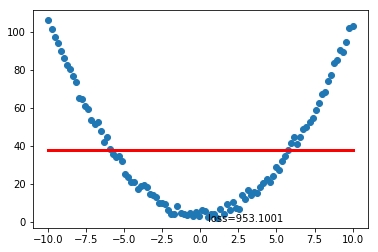

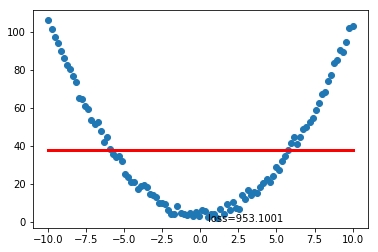

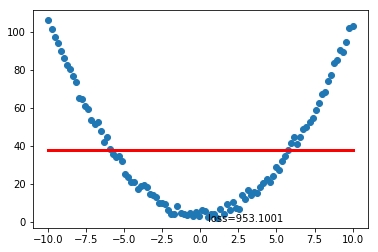

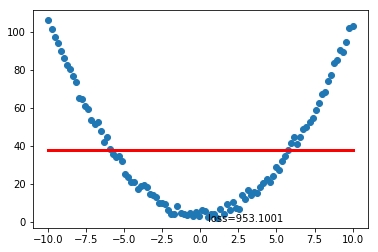

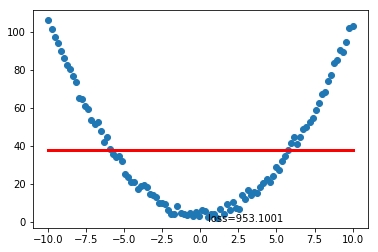

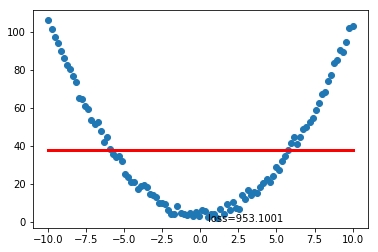

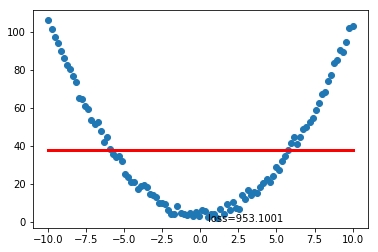

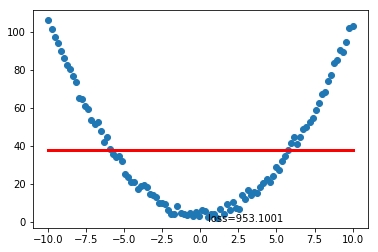

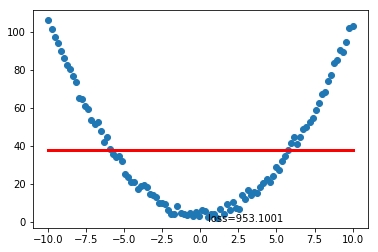

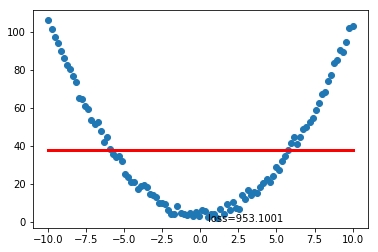

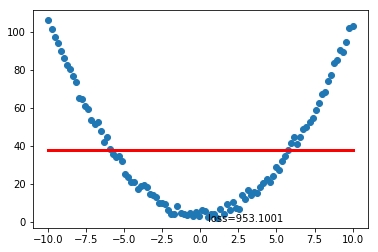

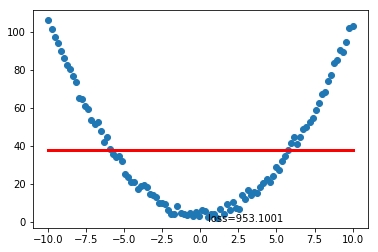

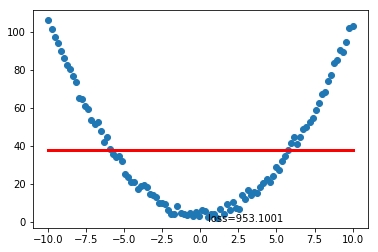

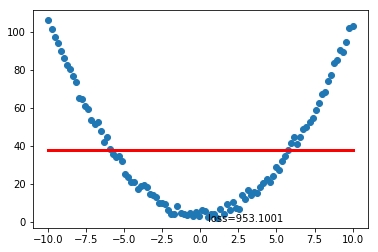

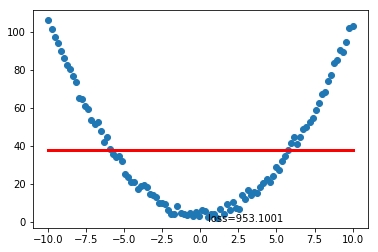

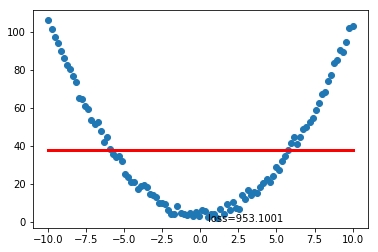

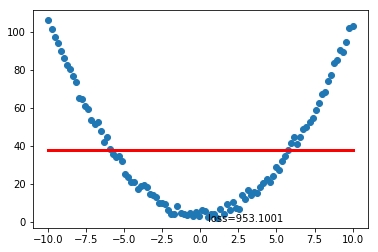

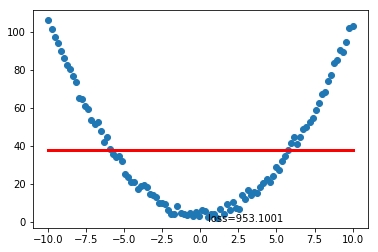

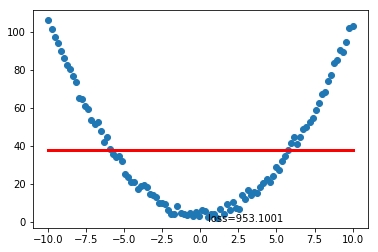

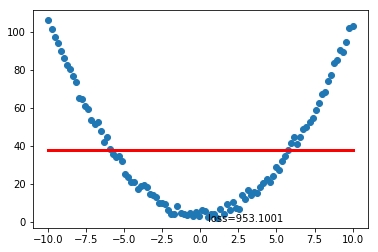

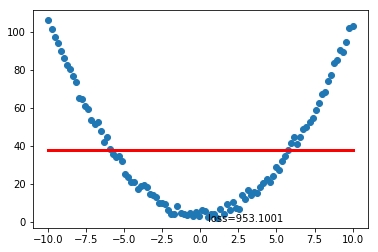

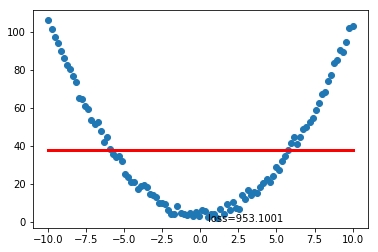

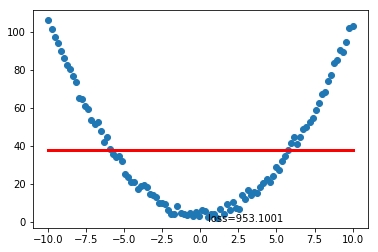

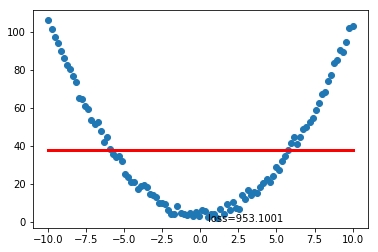

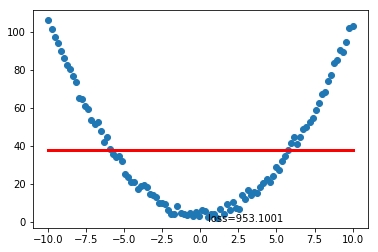

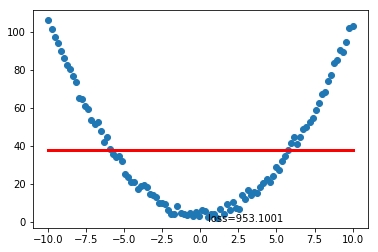

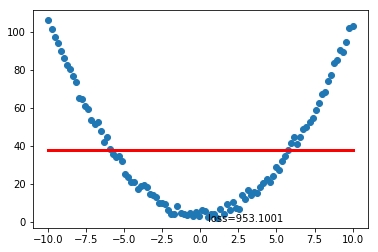

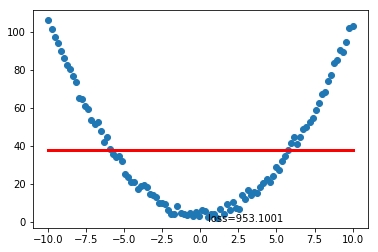

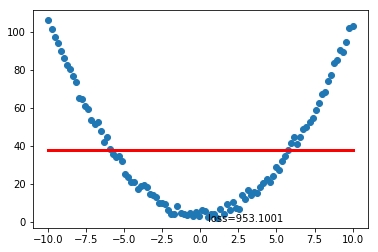

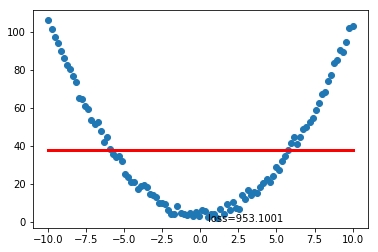

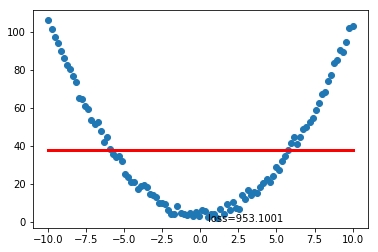

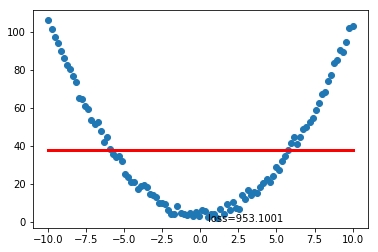

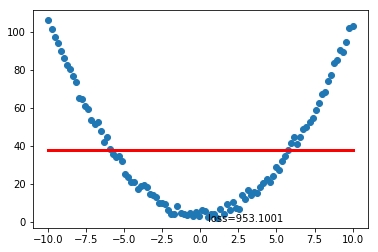

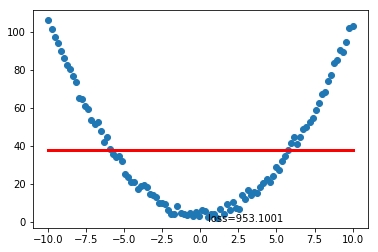

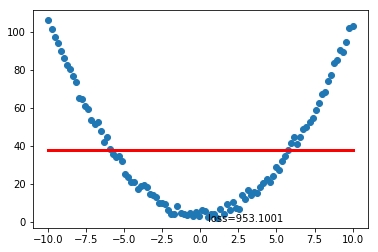

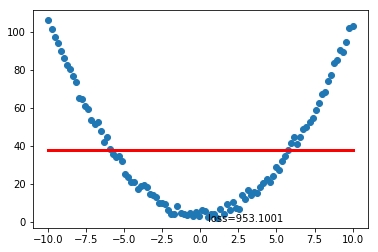

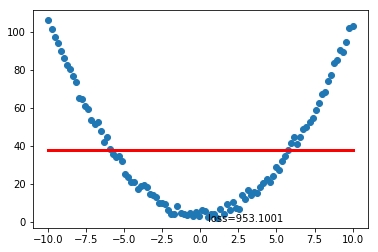

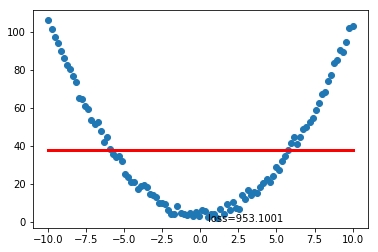

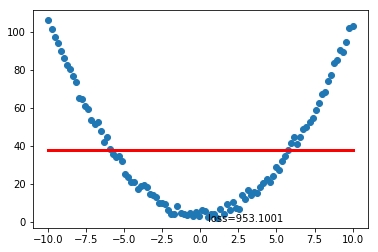

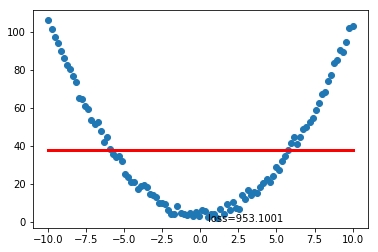

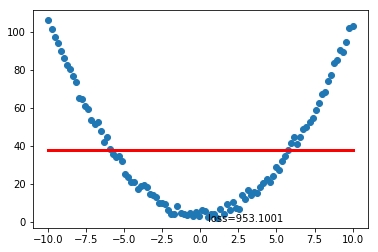

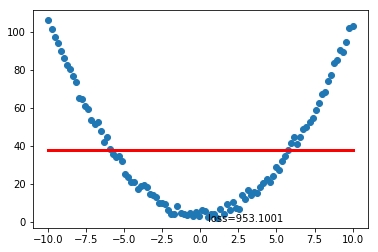

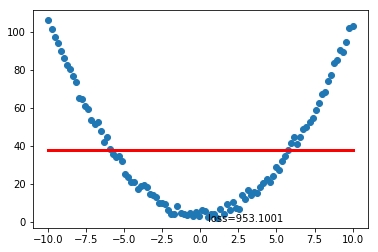

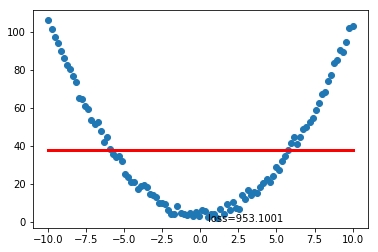

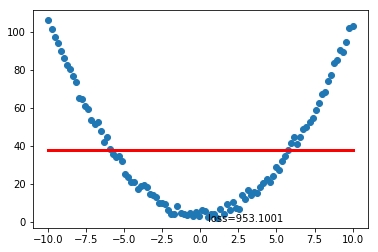

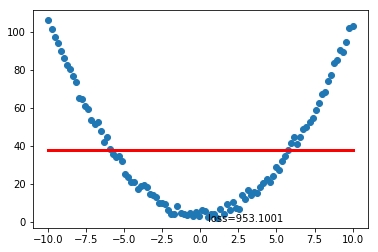

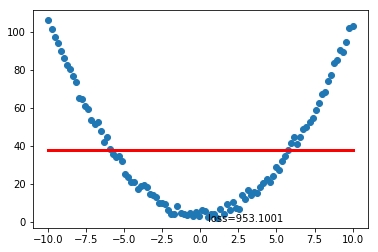

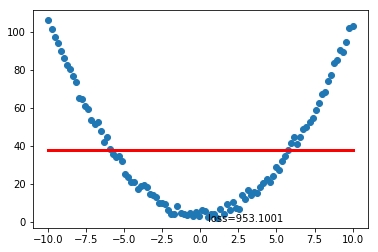

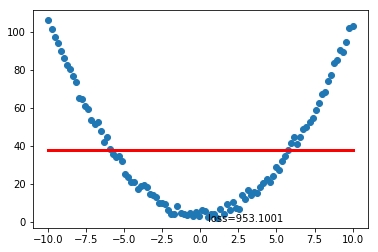

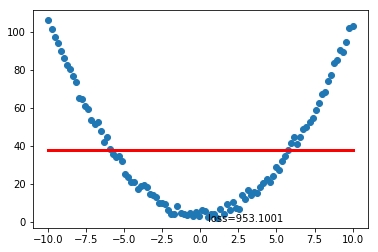

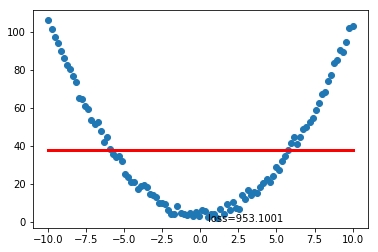

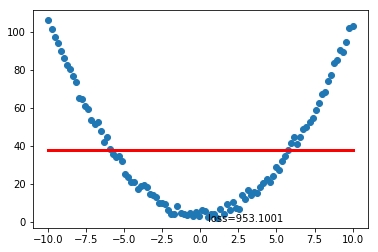

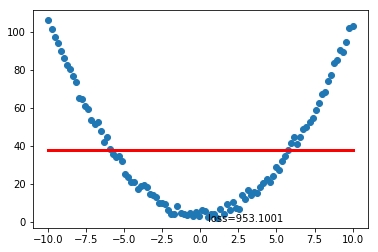

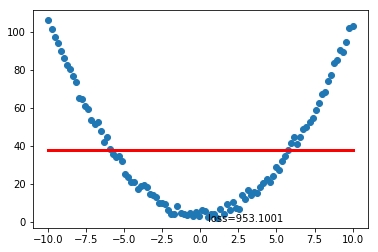

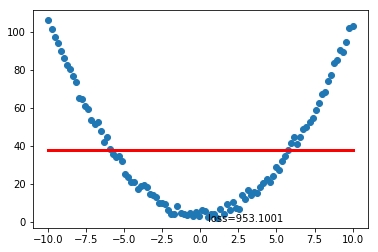

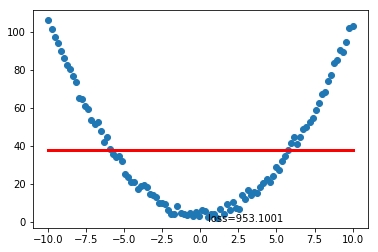

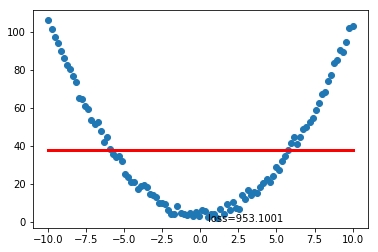

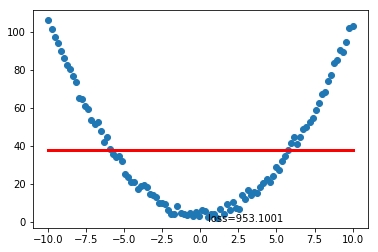

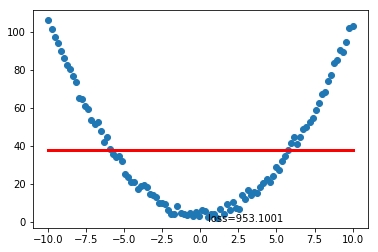

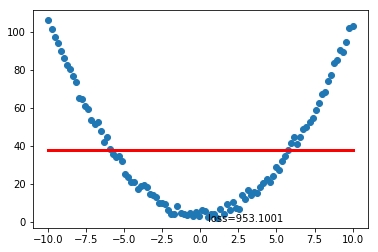

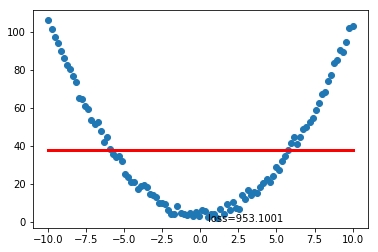

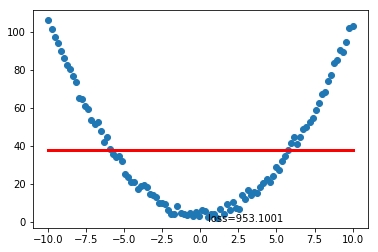

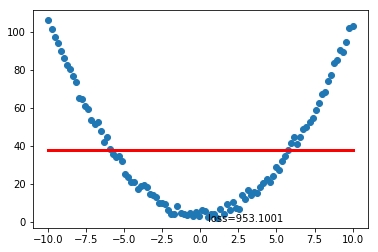

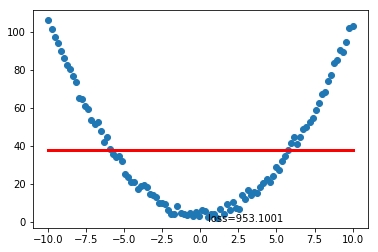

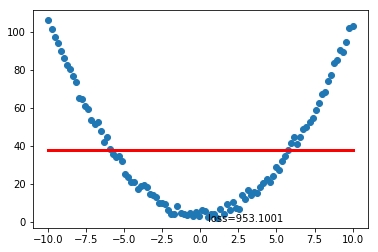

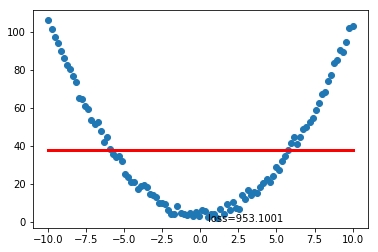

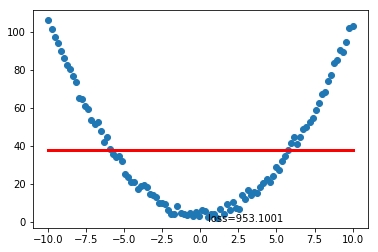

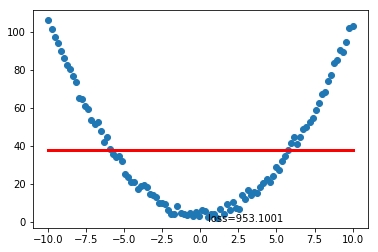

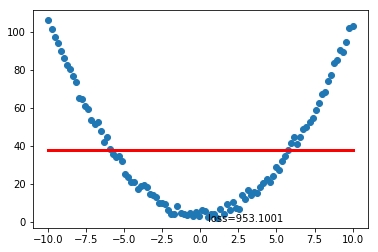

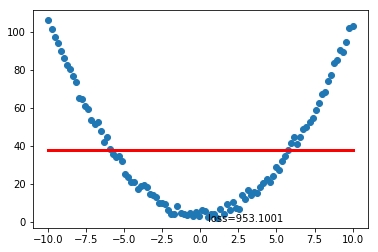

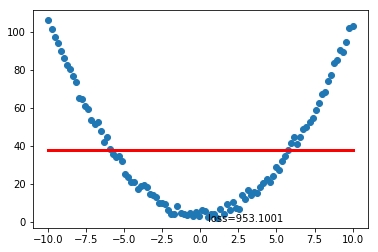

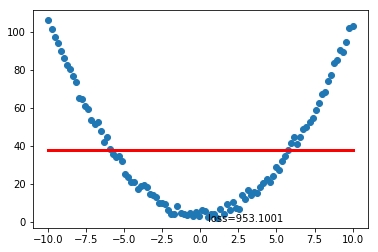

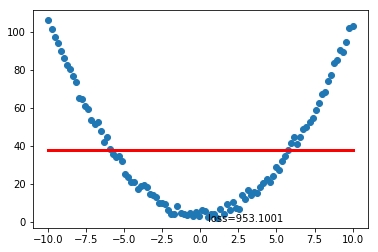

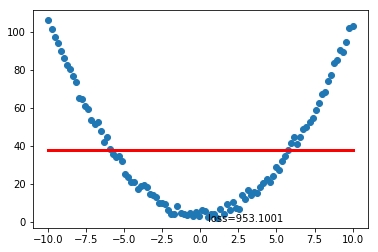

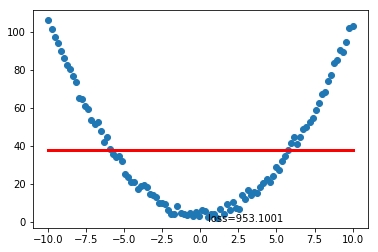

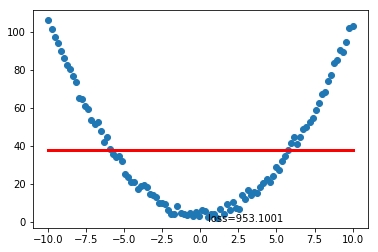

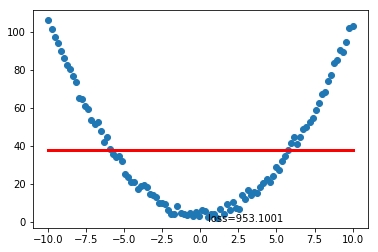

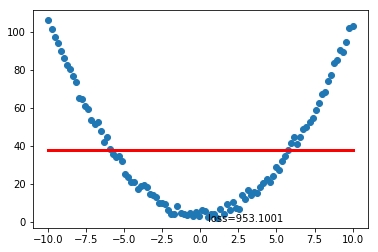

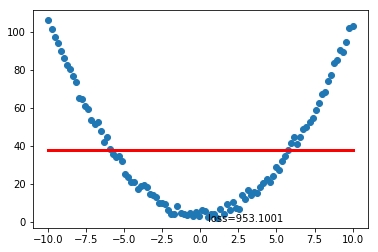

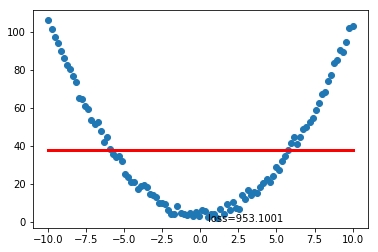

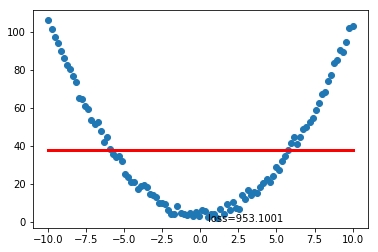

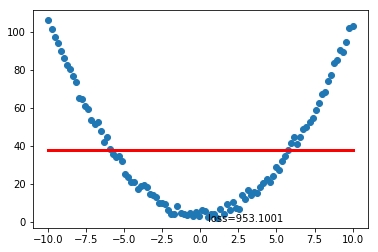

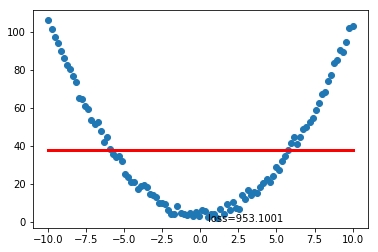

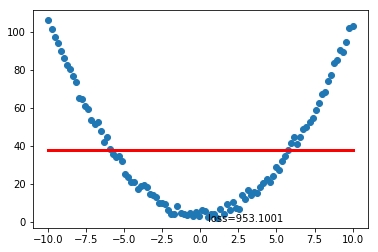

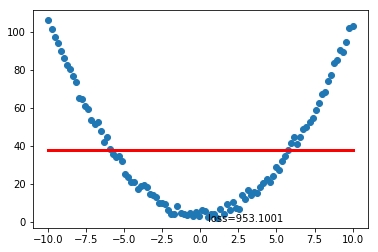

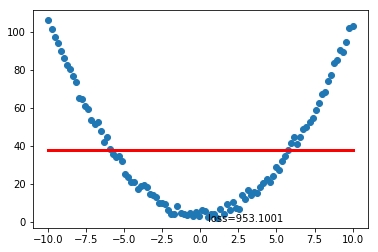

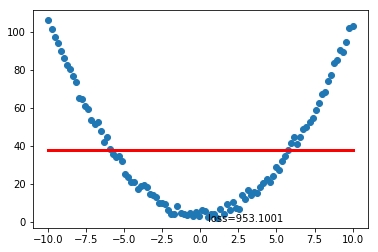

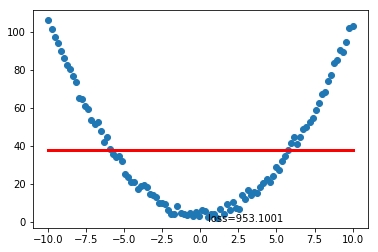

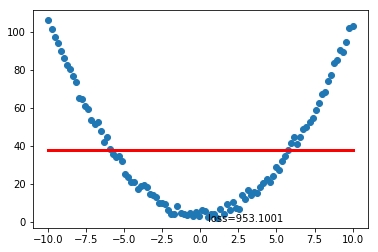

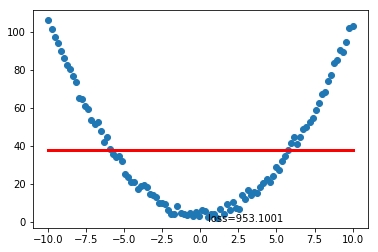

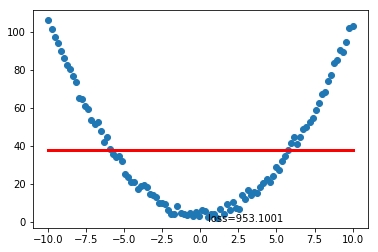

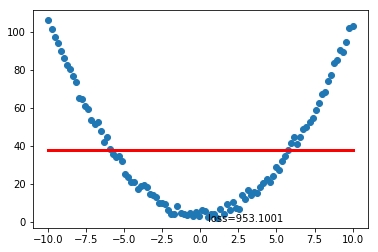

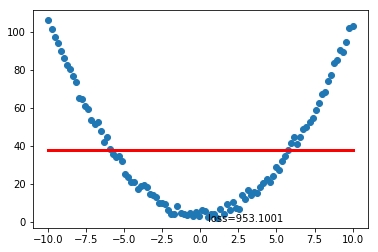

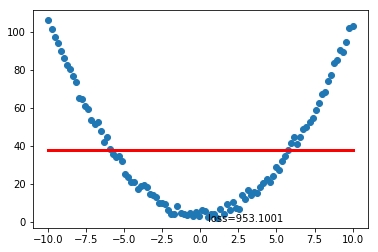

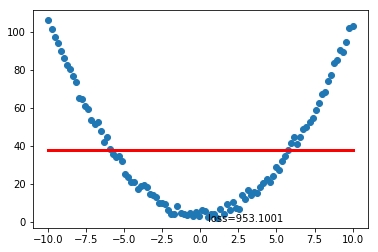

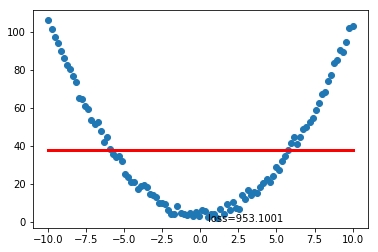

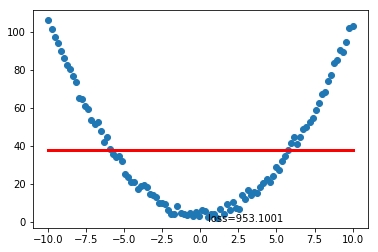

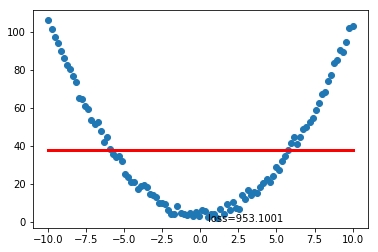

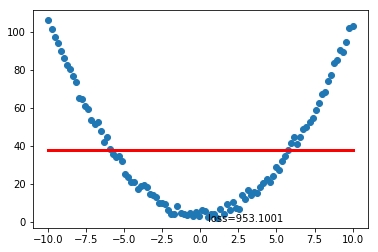

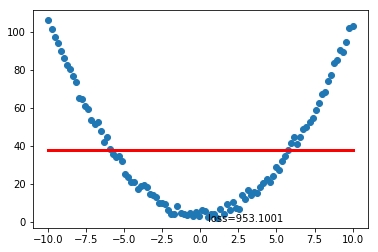

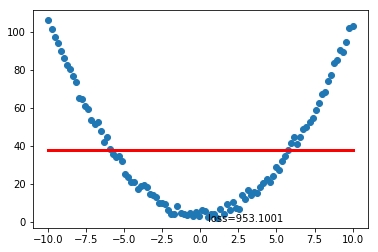

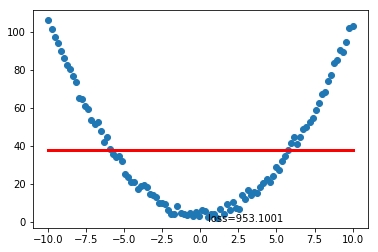

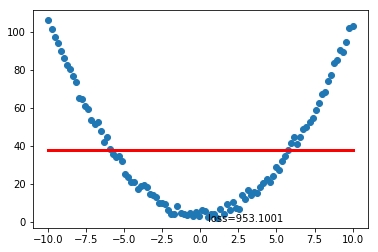

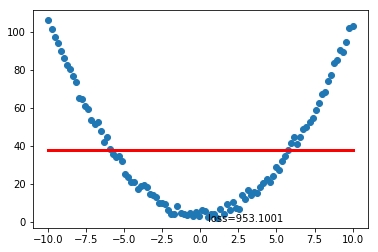

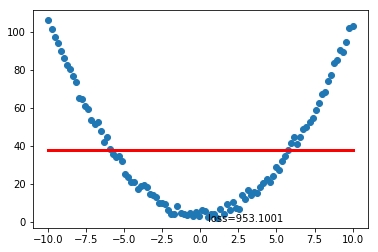

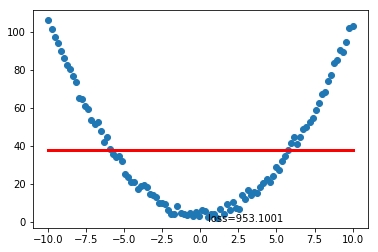

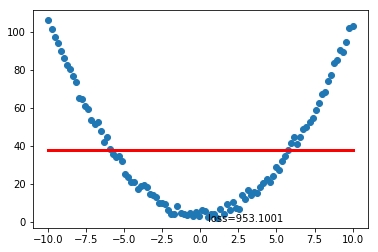

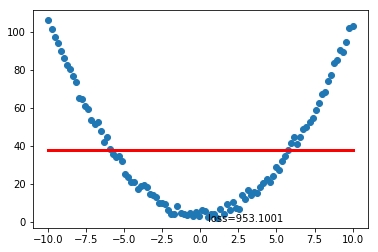

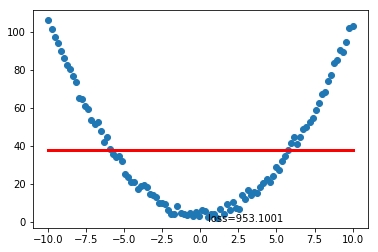

KeyboardInterrupt: 

In [74]:
plt.ion()
for t in range(10000):
    prediction=net(x)
    loss=loss_func(prediction,y)
    optimizer.zero_grad()
    optimizer.step()
    loss.backward()
    optimizer.step()
    if t%10==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=3)
        plt.text(0.5,0,'loss=%.4f'%loss.data[0])
        plt.show()
#         plt.pause(0.2)
        